In [2]:
pip install pandas


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------------- ------ 51.2/60.8 kB 292.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 324.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 960.0 kB/s eta 0:00:13
   ---------------------------------------- 0.0/11.6 MB 960.0 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.6 MB 491.5 kB/s eta 0:00:24
   ---------------------------------------- 0.1/11.6 MB 708.1 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.6 MB 853.3 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.6 MB 731.4 kB/s eta 0:00:16
    -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\WENDY\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib seaborn plotly


     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ----------- ---------------------------- 30.7/106.6 kB ? eta -:--:--
     ----------- ---------------------------- 30.7/106.6 kB ? eta -:--:--
     -------------- ---------------------- 41.0/106.6 kB 245.8 kB/s eta 0:00:01
     ------------------------ ------------ 71.7/106.6 kB 357.2 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/106.6 kB 438.1 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/106.6 kB 438.1 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/106.6 kB 438.1 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/106.6 kB 438.1 kB/s eta 0:00:01
     ------------------------------------ 106.6/106.6 kB 256.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\WENDY\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
# Load data
try:
    df = pd.read_csv('owid-covid-data.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'owid-covid-data.csv' not found. Please ensure the file is in your working directory.")
    exit()

# Check columns
print("\nColumns in the dataset:")
print(df.columns)

# Preview rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Identify missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Data loaded successfully!

Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_va

In [6]:
# Filter countries of interest
countries_of_interest = ['Kenya', 'United States', 'India', 'United Kingdom', 'Brazil']
df_filtered = df[df['location'].isin(countries_of_interest)].copy() # .copy() to avoid SettingWithCopyWarning

# Drop rows with missing dates or critical values (e.g., total_cases, total_deaths)
df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# Convert date column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Sort by date for proper interpolation
df_filtered.sort_values(by=['location', 'date'], inplace=True)

# Handle missing numeric values with interpolation for time series data
# We'll interpolate for key numerical columns relevant to our analysis
numeric_cols_to_fill = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 
                        'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 
                        'total_boosters', 'reproduction_rate', 'icu_patients', 'hosp_patients']

for col in numeric_cols_to_fill:
    if col in df_filtered.columns:
        df_filtered[col] = df_filtered.groupby('location')[col].transform(lambda x: x.interpolate(method='linear', limit_direction='forward', limit_area='inside'))
        # After interpolation, fill any remaining NaNs (e.g., at the beginning of a series) with 0 or a suitable value
        df_filtered[col] = df_filtered.groupby('location')[col].transform(lambda x: x.fillna(0))


print("\nData after cleaning and filtering:")
print(df_filtered.head())
print("\nMissing values after cleaning:")
print(df_filtered.isnull().sum())


Data after cleaning and filtering:
      iso_code      continent location       date  total_cases  new_cases  \
41643      BRA  South America   Brazil 2020-03-19        291.0       57.0   
41644      BRA  South America   Brazil 2020-03-20        428.0      137.0   
41645      BRA  South America   Brazil 2020-03-21        428.0        0.0   
41646      BRA  South America   Brazil 2020-03-22        904.0      476.0   
41647      BRA  South America   Brazil 2020-03-23        904.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
41643              36.714           1.0         1.0                0.143  ...   
41644              52.571           4.0         3.0                0.571  ...   
41645              50.143           4.0         0.0                0.571  ...   
41646             117.143          11.0         7.0                1.571  ...   
41647             111.857          11.0         0.0                1.571  ...   

       male_sm

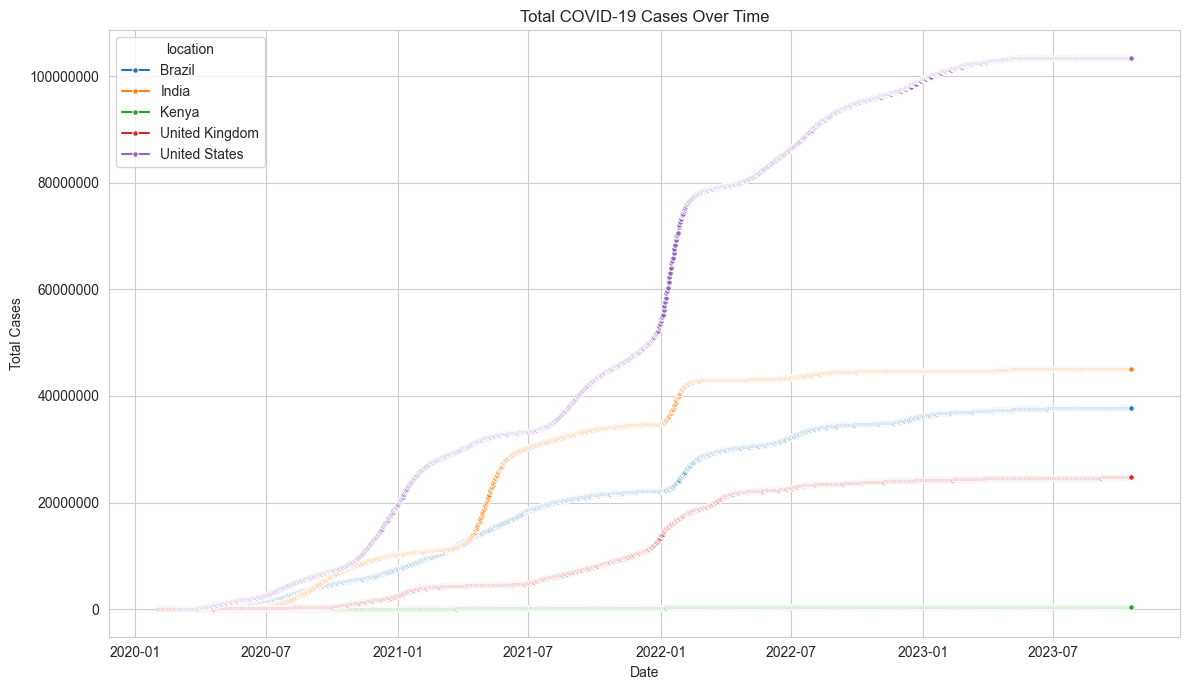

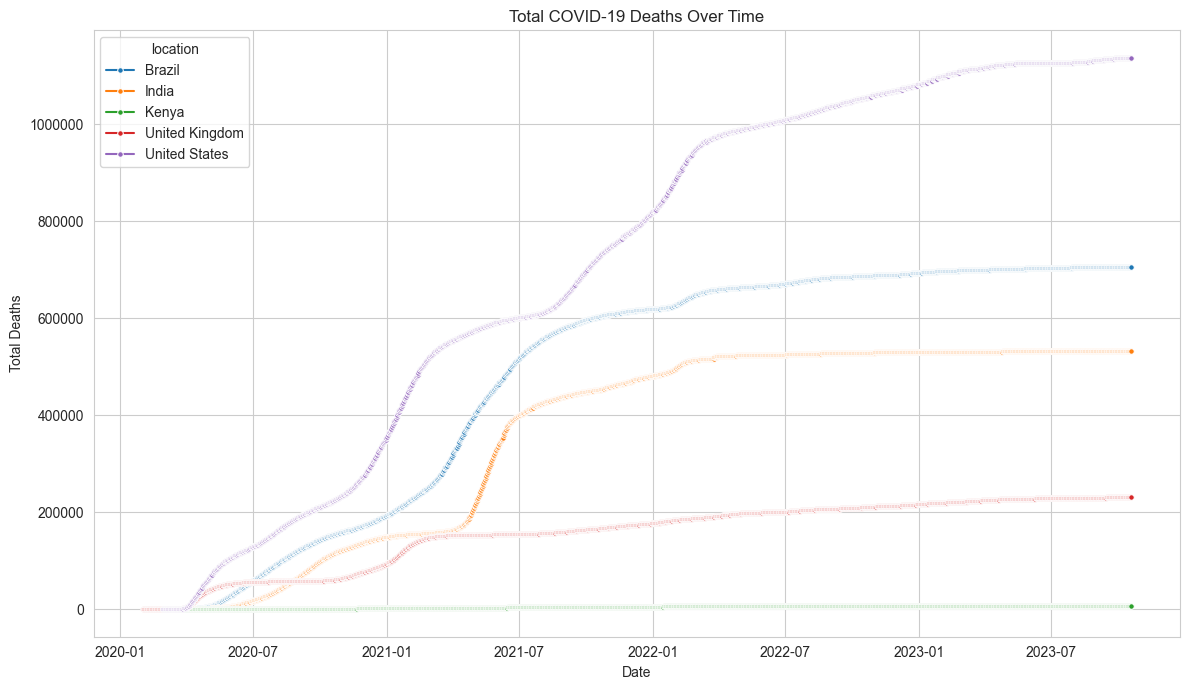

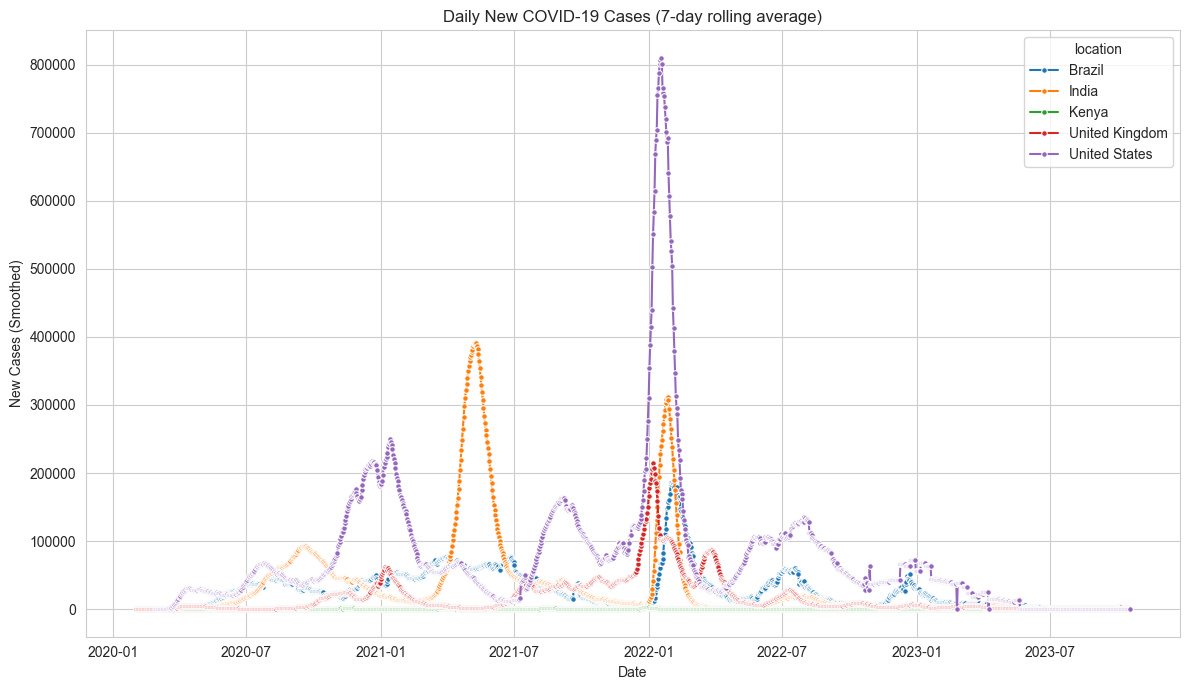

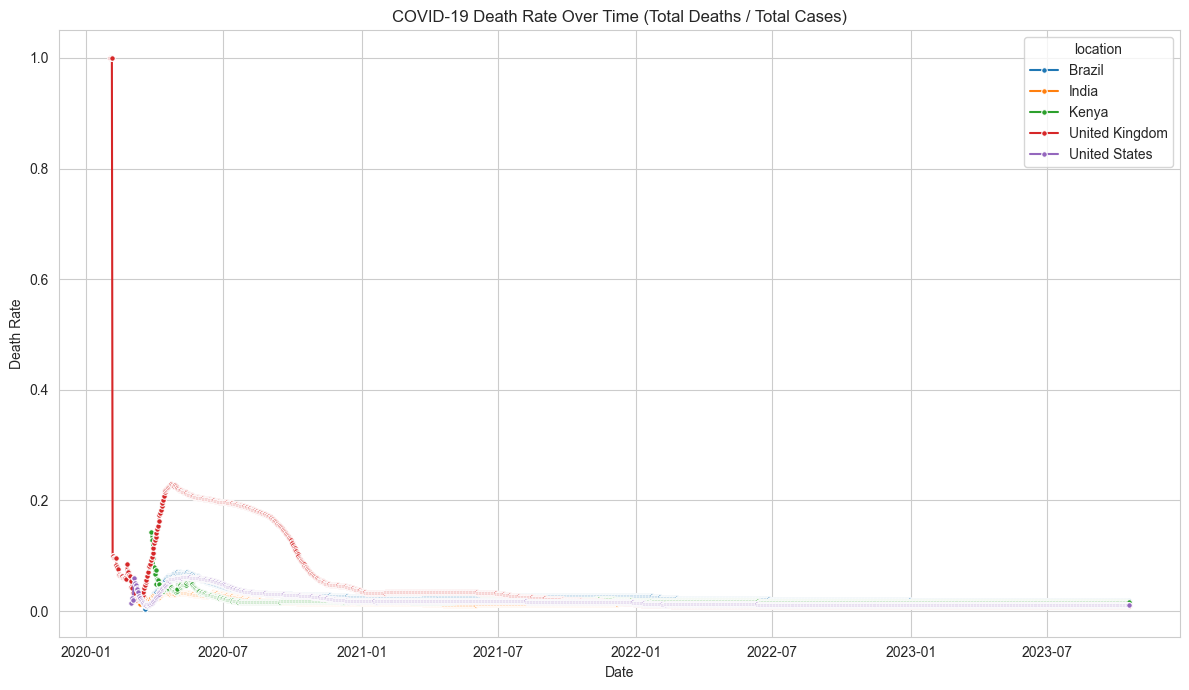

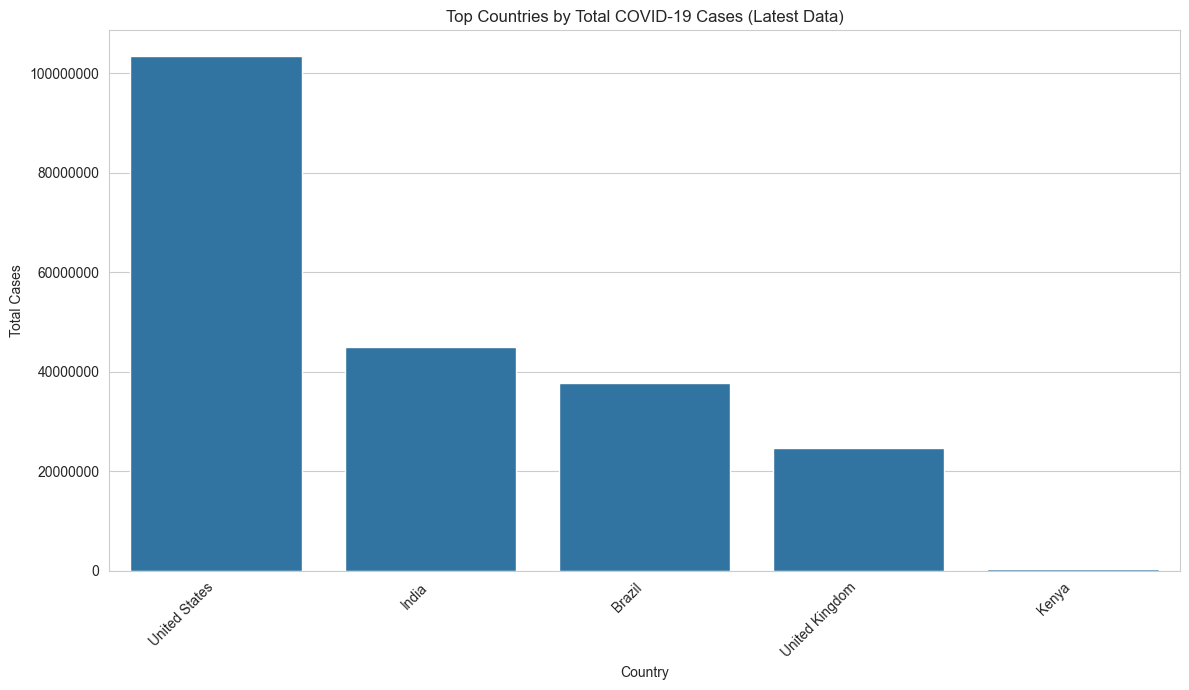

In [7]:
# Set plot style
sns.set_style("whitegrid")

# Plot total cases over time for selected countries
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x='date', y='total_cases', hue='location', marker='o', markersize=4)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation for y-axis
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot total deaths over time for selected countries
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x='date', y='total_deaths', hue='location', marker='o', markersize=4)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare daily new cases between countries (7-day rolling average for smoother visualization)
df_filtered['new_cases_smoothed'] = df_filtered.groupby('location')['new_cases'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x='date', y='new_cases_smoothed', hue='location', marker='o', markersize=4)
plt.title('Daily New COVID-19 Cases (7-day rolling average)')
plt.xlabel('Date')
plt.ylabel('New Cases (Smoothed)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate the death rate: total_deaths / total_cases
# Avoid division by zero by replacing 0 total_cases with NaN and then filling with 0
df_filtered['death_rate'] = (df_filtered['total_deaths'] / df_filtered['total_cases']).replace([float('inf'), -float('inf')], pd.NA).fillna(0)
# Ensure the death rate is not NaN if total_cases is 0
df_filtered.loc[df_filtered['total_cases'] == 0, 'death_rate'] = 0

# Plot death rate over time for selected countries
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x='date', y='death_rate', hue='location', marker='o', markersize=4)
plt.title('COVID-19 Death Rate Over Time (Total Deaths / Total Cases)')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart: Top countries by total cases (latest date)
latest_data = df_filtered.loc[df_filtered.groupby('location')['date'].idxmax()]
top_countries_cases = latest_data.sort_values(by='total_cases', ascending=False).head(10) # Adjust head() as needed

plt.figure(figsize=(12, 7))
sns.barplot(x='location', y='total_cases', data=top_countries_cases)
plt.title('Top Countries by Total COVID-19 Cases (Latest Data)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

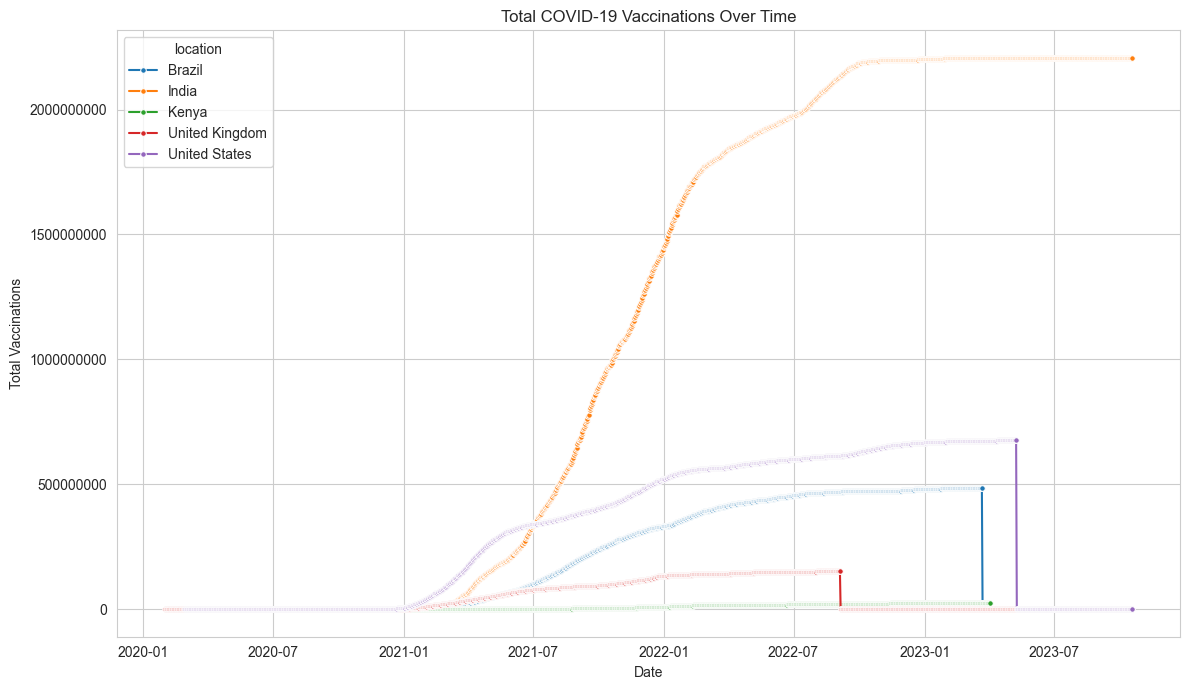

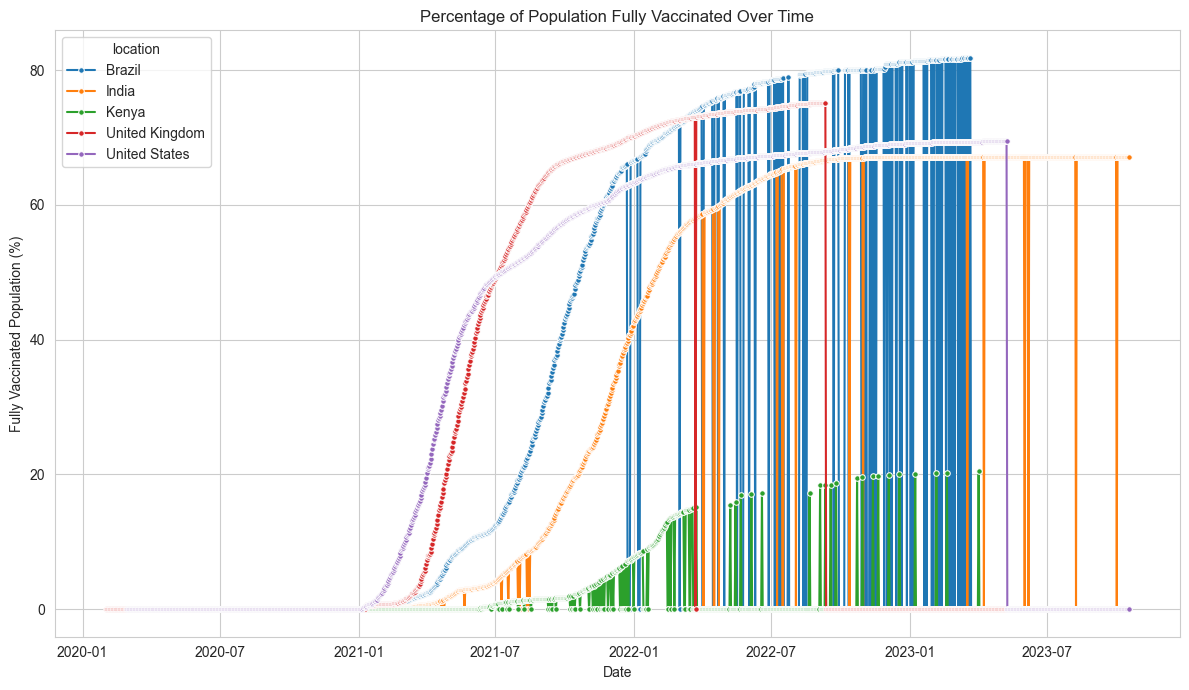

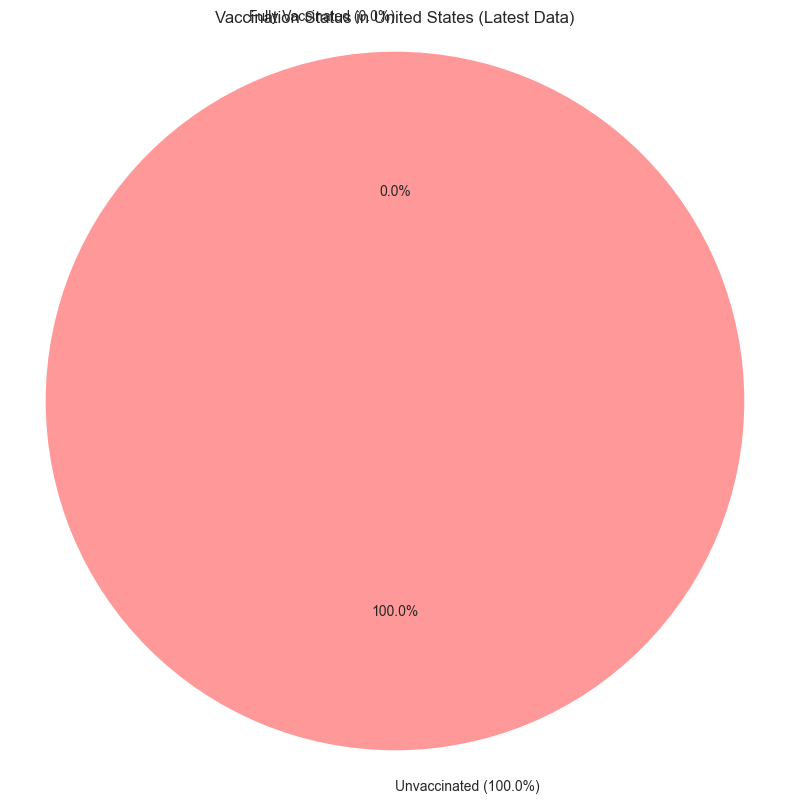

In [8]:
# Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x='date', y='total_vaccinations', hue='location', marker='o', markersize=4)
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare % vaccinated population (people_fully_vaccinated_per_hundred)
# Fill missing values for vaccination data with 0 if it makes sense (implies no vaccinations yet)
df_filtered['people_fully_vaccinated_per_hundred'] = df_filtered['people_fully_vaccinated_per_hundred'].fillna(0)

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_filtered, x='date', y='people_fully_vaccinated_per_hundred', hue='location', marker='o', markersize=4)
plt.title('Percentage of Population Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Population (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Pie chart for vaccinated vs. unvaccinated (latest data for one country, e.g., USA)
usa_latest = latest_data[latest_data['location'] == 'United States']

if not usa_latest.empty and 'population' in usa_latest.columns and 'people_fully_vaccinated' in usa_latest.columns:
    total_population = usa_latest['population'].iloc[0]
    fully_vaccinated = usa_latest['people_fully_vaccinated'].iloc[0]

    # Ensure fully_vaccinated is not greater than total_population
    if fully_vaccinated > total_population:
        fully_vaccinated = total_population

    unvaccinated = total_population - fully_vaccinated
    
    # Handle cases where fully_vaccinated or unvaccinated might be negative due to data inconsistencies or filling
    if fully_vaccinated < 0: fully_vaccinated = 0
    if unvaccinated < 0: unvaccinated = 0

    # If sum is zero, prevent division by zero for percentage calculation
    if fully_vaccinated + unvaccinated == 0:
        sizes = [0, 0]
        labels = ['Fully Vaccinated', 'Unvaccinated']
    else:
        sizes = [fully_vaccinated, unvaccinated]
        labels = [f'Fully Vaccinated ({fully_vaccinated/total_population*100:.1f}%)', 
                  f'Unvaccinated ({unvaccinated/total_population*100:.1f}%)']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
    plt.title(f'Vaccination Status in United States (Latest Data)')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()
else:
    print("\nCould not generate pie chart for USA vaccination status due to missing data.")

Case Trajectories: The total COVID-19 cases show different patterns across the selected countries. USA and India experienced very high peaks while Kenya remained relatively low. 
Impact of Waves on Daily New Cases: The peaks and troughs indicate periods of intense spread and subsequent decline, likely influenced by public health measures, new variants and vaccination efforts.
Death Rate Fluctuations: The death rate (total deaths / total cases) varies and can be influenced by reporting practices, testing rates, healthcare capacity, and the dominant variants circulating at different times. It's important to note that a lower death rate doesn't necessarily mean fewer deaths, but rather a different proportion relative to confirmed cases.
Disparities in Vaccination Rollout: There are clear differences in vaccination progress. The United States and United Kingdom show higher percentages of fully vaccinated populations compared to Kenya and India, reflecting potential disparities in vaccine access, distribution, or public acceptance. Brazil has also made significant progress.
Correlation between Cases and Deaths (Implicit): While not explicitly plotted as a correlation heatmap, the parallel trends observed in total cases and total deaths over time strongly suggest a direct correlation between the two. Periods of high case numbers generally preceded or coincided with increases in death tolls.

